## **1. Feature Engineering**   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# Delete Unnecessary Columns
df = pd.read_csv("AllData.csv")
df.drop(['CheakIn', 'CheckOut', 'Unnamed: 0'], axis=1, inplace=True)
df

,Name,Star,Rating,RoomType,Price(USD),RoomSize(m^2),Month,2 swimming pools,24-hour front desk,Air conditioning,...,Laundry,Lift,Non-smoking rooms,Outdoor swimming pool,Private beach area,Restaurant,Room service,Spa and wellness centre,Tea/coffee maker in all rooms,Terrace
0,Two Seasons Siem Reap Hotel,5,9.2,Deluxe Twin Room with Balcony - Free one way T...,66.82975,32.0,May,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1,Two Seasons Siem Reap Hotel,5,9.2,Junior Suite with Balcony - Free one way Transfer,80.75250,38.0,May,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,Two Seasons Siem Reap Hotel,5,9.2,Deluxe Twin Room with Balcony - Free one way T...,69.61425,32.0,May,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,Two Seasons Siem Reap Hotel,5,9.2,Junior Suite with Balcony - Free one way Transfer,89.10625,38.0,May,0,0,0,...,0,0,1,1,0,1,0,0,1,0
4,Two Seasons Siem Reap Hotel,5,9.2,King Suite with Balcony - Free one way Transfer,100.24450,45.0,May,0,0,0,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51809,IKI IKI Guesthouse,0,8.8,Double Room,18.56375,25.0,November,0,0,1,...,0,0,1,0,0,1,1,0,0,1
51810,IKI IKI Guesthouse,0,8.8,Twin Room,21.34850,25.0,November,0,0,1,...,0,0,1,0,0,1,1,0,0,1
51811,IKI IKI Guesthouse,0,8.8,Triple Room,25.61800,25.0,November,0,0,1,...,0,0,1,0,0,1,1,0,0,1
51812,IKI IKI Guesthouse,0,8.8,Triple Room,28.46450,25.0,November,0,0,1,...,0,0,1,0,0,1,1,0,0,1


## **Delete Unnecessary Column**

In [3]:
# Delete All Suite Type, Villa, Apartment Type
df["RoomType"] = df["RoomType"].str.lower()
df = df[~df["RoomType"].str.contains("suite", case = "False")]
df = df[~df["RoomType"].str.contains("champei room", case = "False")]
df = df[~df["RoomType"].str.contains("landmark room", case = "False")]
df = df[~df["RoomType"].str.contains("villa", case = "False")]

df = df[~df["Name"].str.contains("Isann Lodge", case = "False")]
df = df[~df["Name"].str.contains("Dontrei Villa Angkor", case = "False")]
df = df[~df["Name"].str.contains("Maison Leab", case = "False")]
df = df[~df["Name"].str.contains("Panhanita Apartment and Villa", case = "False")]
df.loc[df["RoomType"].str.contains("suite", case = "False")]

,Name,Star,Rating,RoomType,Price(USD),RoomSize(m^2),Month,2 swimming pools,24-hour front desk,Air conditioning,...,Laundry,Lift,Non-smoking rooms,Outdoor swimming pool,Private beach area,Restaurant,Room service,Spa and wellness centre,Tea/coffee maker in all rooms,Terrace


In [4]:
df['RoomType'].unique()

array(['deluxe twin room with balcony - free one way transfer',
       'deluxe double room with balcony - free one way transfer',
       'superior double room', 'superior twin room', 'deluxe double room',
       'deluxe twin room', 'deluxe king room',
       'deluxe king room with balcony', 'deluxe twin room with balcony',
       'deluxe double room with pool view',
       'special group offer (5 rooms)', 'single room',
       'superior family room', 'double room with shared bathroom',
       'superior triple room',
       'deluxe king room - free airport transfers + mini-bar',
       'cabana king room - free airport transfers + mini-bar',
       'deluxe king room - free daily 60mn spa treatment + airport pickup',
       'deluxe twin room - free airport transfers + mini-bar',
       'cabana twin room - free airport transfers + mini-bar',
       'king room with two king beds', 'standard twin room',
       'twin room with terrace', 'superior king room',
       'economy twin room', 'queen

## **Create New Feature and Label Encoding**

In [5]:
# Change Room type to a better representation of Room Type

# Define a function to extract the room type from the string
def extract_room_type(room_type_string):

    if "single" in room_type_string:
        return "Single"
    elif "double" in room_type_string or "twin" in room_type_string:
        return "Double/Twin"
    elif "triple" in room_type_string:
        return 'Triple'
    elif "quadruple" in room_type_string:
        return 'Quadruple'
    
    
    elif "special group offer (5 rooms)" in room_type_string:  # Added condition check
        return "Double/Twin (5 Rooms Special Offer)"
    elif "dormitory" in room_type_string:  # Added condition check
        return "Dormitory"
    elif "family" in room_type_string:  # Added condition check
        return "Family"
    
    elif "cabana pool access" in room_type_string:  # Added condition check
        return "Double/Twin"
    elif "premier deluxe pool view" in room_type_string:
        return 'Double/Twin'
    elif "club classic room with private balcony" in room_type_string:
        return 'Family'
    elif "deluxe room - free airport transfers + mini-bar" in room_type_string:
        return 'Single'
    
    elif "king room with two king beds" or "superior queen room with two queen beds"in room_type_string or "twin" in room_type_string:
        return "Quadruple"
    elif "queen" in room_type_string or "king" in room_type_string:
        return "Single"
    else:
        return "Other"

# Create new Feature
df['RoomTypeNew'] = df['RoomType'].apply(extract_room_type)
df['Facilities_Score'] = df.iloc[:, 7:30].sum(axis=1)


# Define the mapping dictionary for Room Type, Month
mapping = {'Dormitory': 1, 
           'Single': 2, 
           'Double/Twin': 3, 
           'Triple': 4, 
           'Quadruple': 5, 
           'Double/Twin (5 Rooms Special Offer)':6,
           'Family': 7
           }  
mapping1 = {'May': 5, 
           'June': 6, 
           'July': 7, 
           'August': 8, 
           'September': 9, 
           'October':10,
           'November': 11
           }  

# Apply label encoding
df['RoomTypeNew'] = df['RoomTypeNew'].map(mapping)
df['Month'] = df['Month'].map(mapping1)

# Drop Unnecessary Column
columnFacilities = df.iloc[:, 7:30]
df.drop(['RoomType', 'Name'], axis=1, inplace=True) 
df.drop(columns=columnFacilities, axis = 1, inplace = True)



In [6]:
df["RoomTypeNew"].unique()

array([3, 5, 6, 2, 7, 4, 1], dtype=int64)

In [7]:
df["Month"].unique()

array([ 5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [8]:
df

,Star,Rating,Price(USD),RoomSize(m^2),Month,RoomTypeNew,Facilities_Score
0,5,9.2,66.82975,32.0,5,3,10
2,5,9.2,69.61425,32.0,5,3,10
5,5,9.2,69.61425,32.0,5,3,10
8,5,9.2,69.61425,32.0,5,3,10
9,5,9.2,69.61425,32.0,5,3,10
...,...,...,...,...,...,...,...
51809,0,8.8,18.56375,25.0,11,3,10
51810,0,8.8,21.34850,25.0,11,3,10
51811,0,8.8,25.61800,25.0,11,4,10
51812,0,8.8,28.46450,25.0,11,4,10


In [9]:
#df =df.drop_duplicates()

<Axes: >

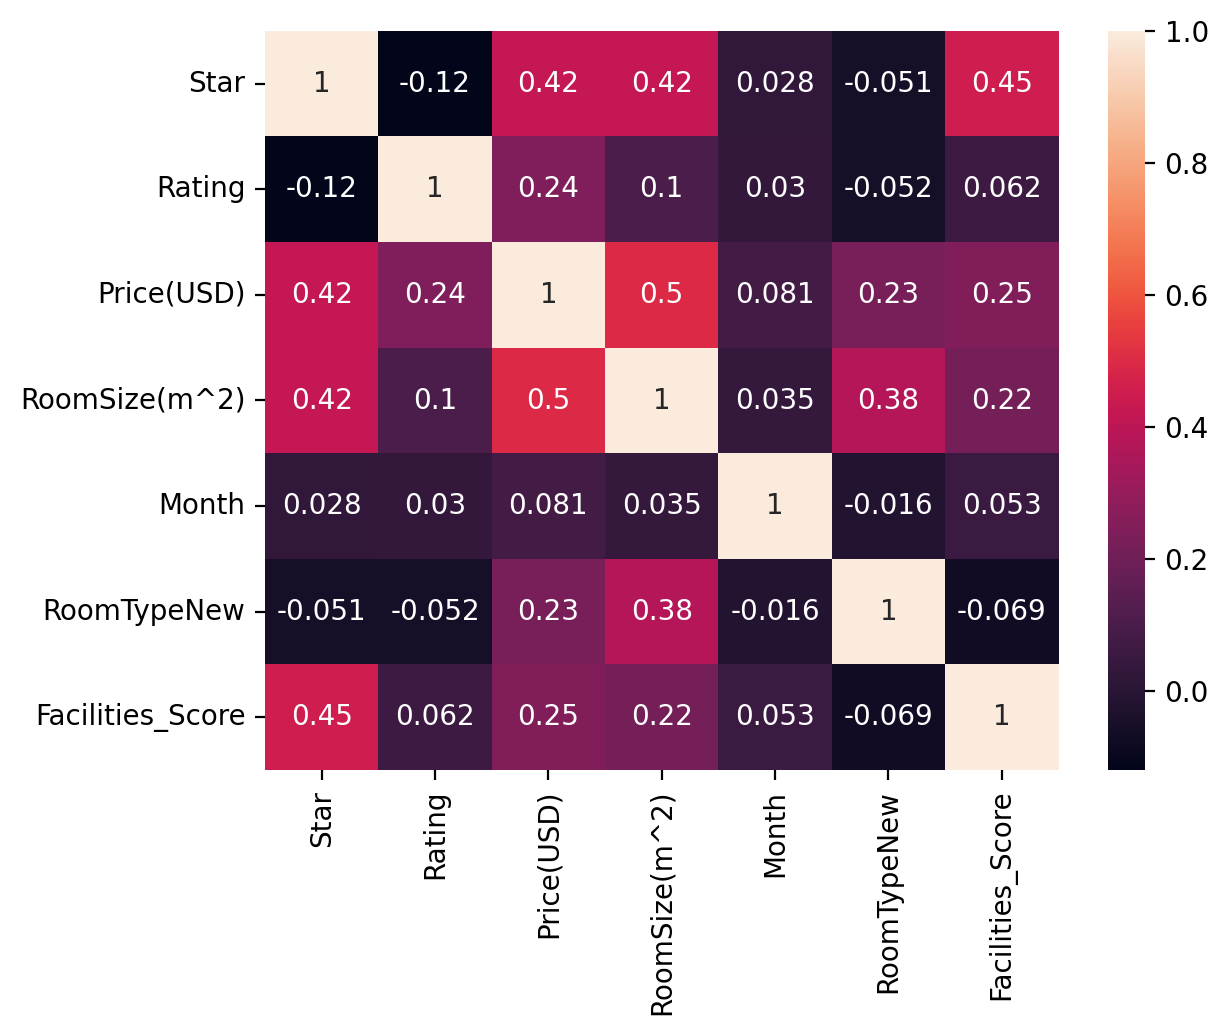

In [10]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot = True)

In [11]:
PriceCorrelation = pd.DataFrame(corelation["Price(USD)"].sort_values(ascending=False))
PriceCorrelation.columns = ["CorrelationValue"]
PriceCorrelation


,CorrelationValue
Price(USD),1.000000
RoomSize(m^2),0.496147
Star,0.420718
Facilities_Score,0.245526
Rating,0.242760
RoomTypeNew,0.225679
Month,0.081021


In [12]:
#sns.pairplot(df)

<Axes: >

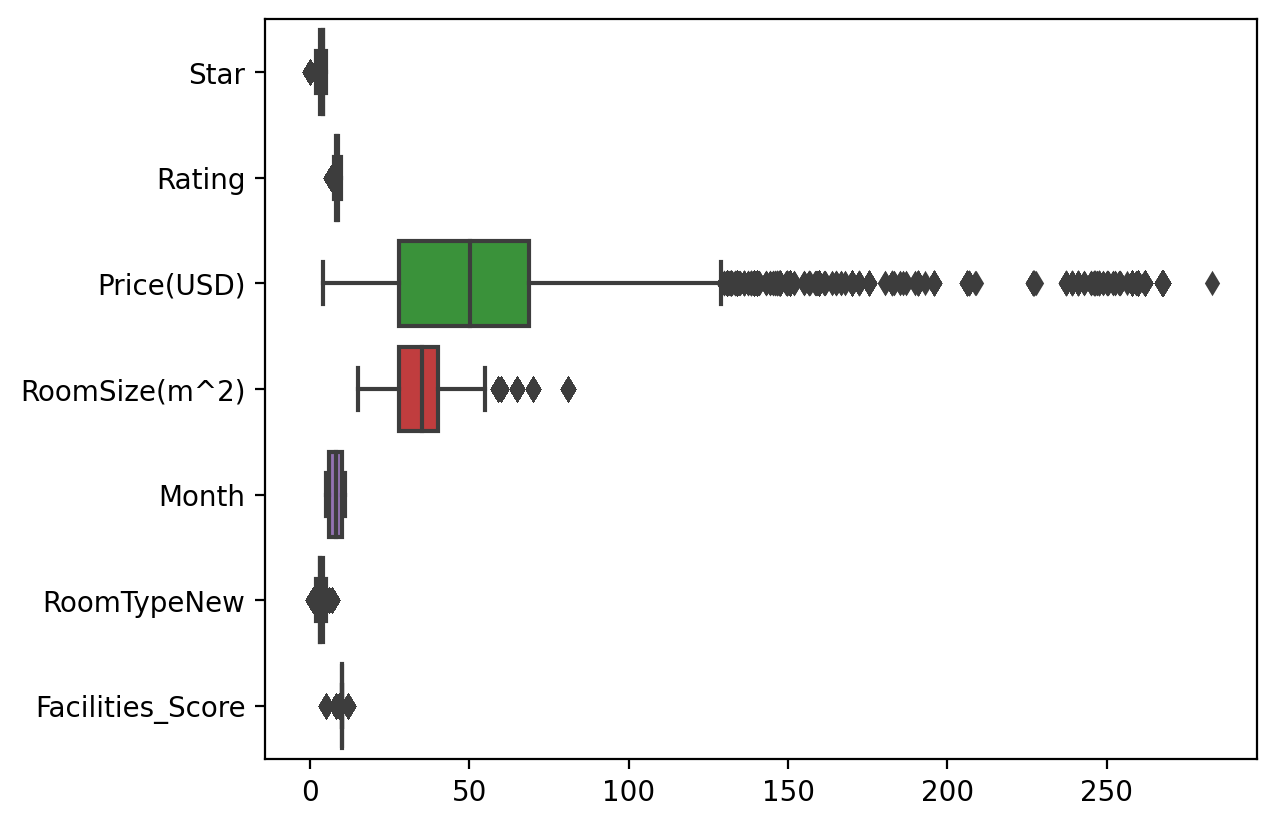

In [13]:
sns.boxplot(df, orient='h')

## **Feature Selection**

Top Features: ['RoomSize(m^2)', 'Month', 'Star', 'RoomTypeNew', 'Rating', 'Facilities_Score']


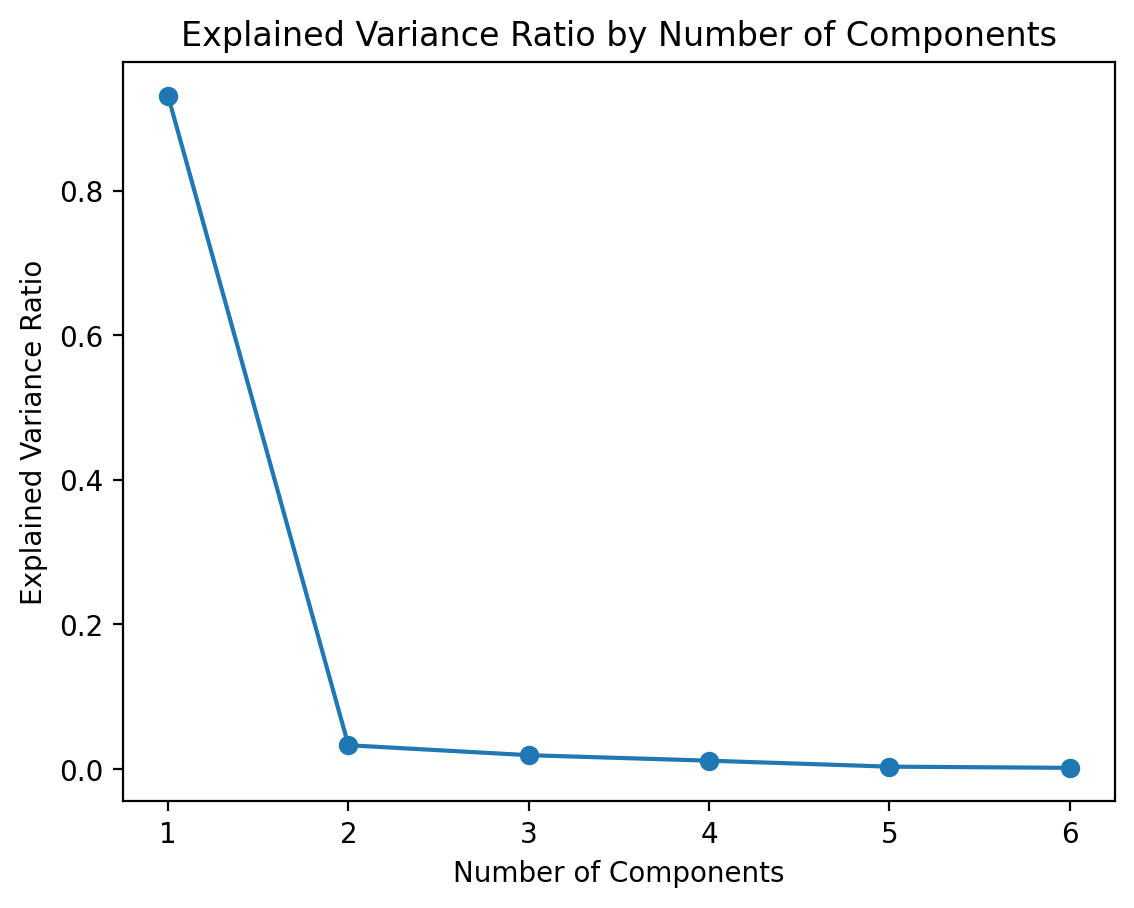

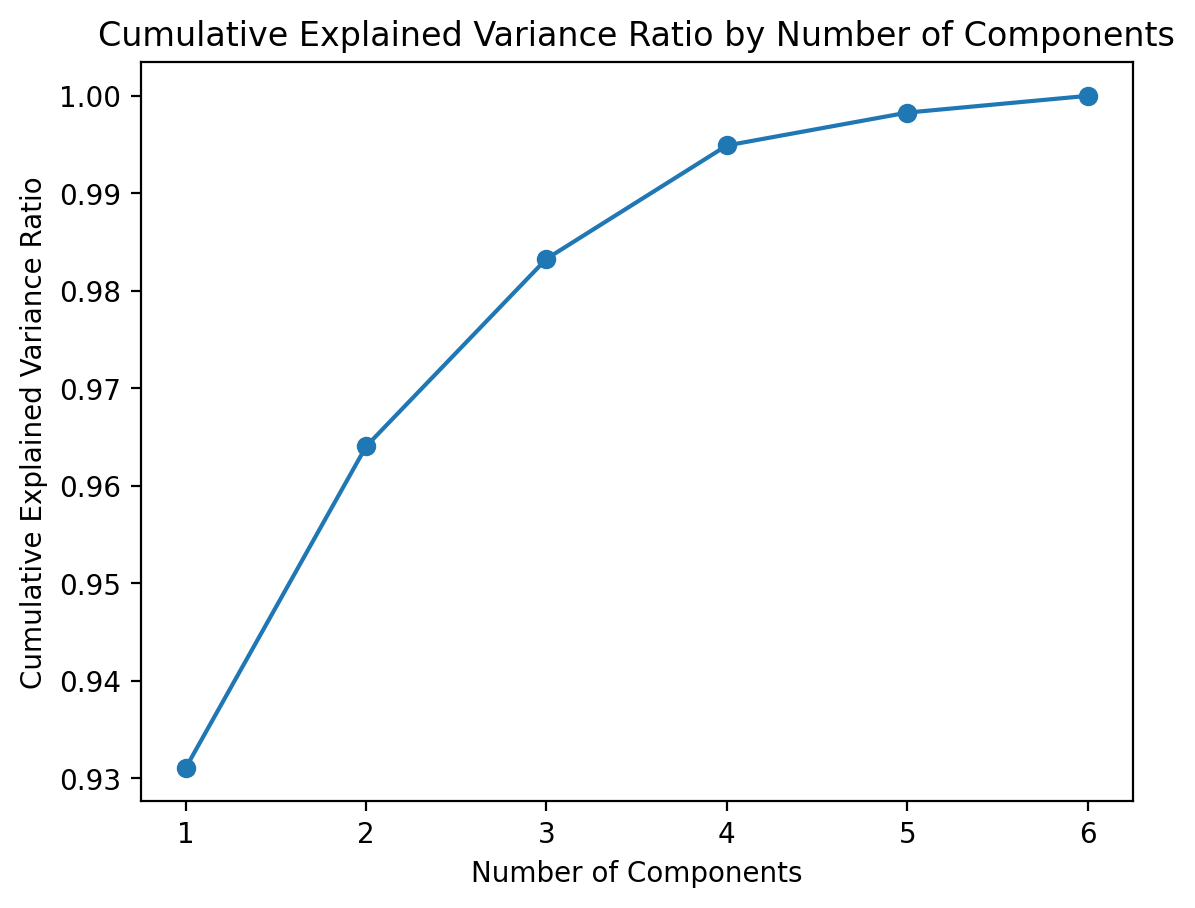

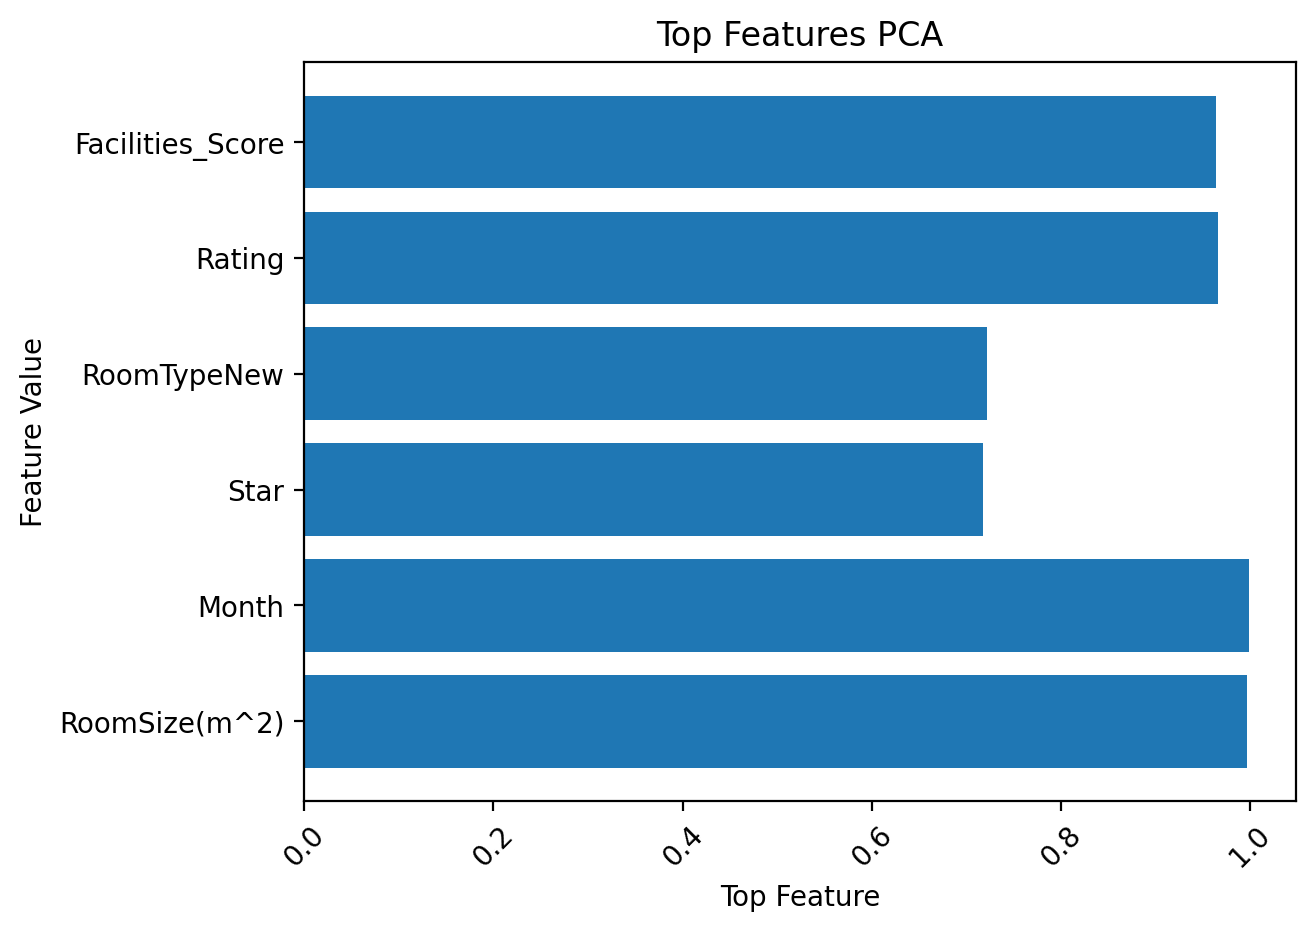

In [14]:
import numpy as np
from sklearn.decomposition import PCA

X = df.drop(["Price(USD)"],axis=1)
y=df["Price(USD)"]

pca = PCA()
pca_data = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = 6
selected_components = pca_data[:, :n_components]

top_features_indices = np.abs(pca.components_[:n_components]).argmax(axis=1)
top_features = [list(X.columns)[index] for index in top_features_indices]
#print("Explained Variance Ratios:", explained_variance_ratio)
#print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio[-1])
print("Top Features:", top_features)

import matplotlib.pyplot as plt

# Plotting explained variance ratios
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

# Plotting cumulative explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.show()


# Plotting top features and their values
plt.barh(top_features, np.abs(pca.components_[:n_components]).max(axis=1))
plt.xlabel('Top Feature')
plt.ylabel('Feature Value')
plt.title('Top Features PCA')
plt.xticks(rotation=45)
plt.show()

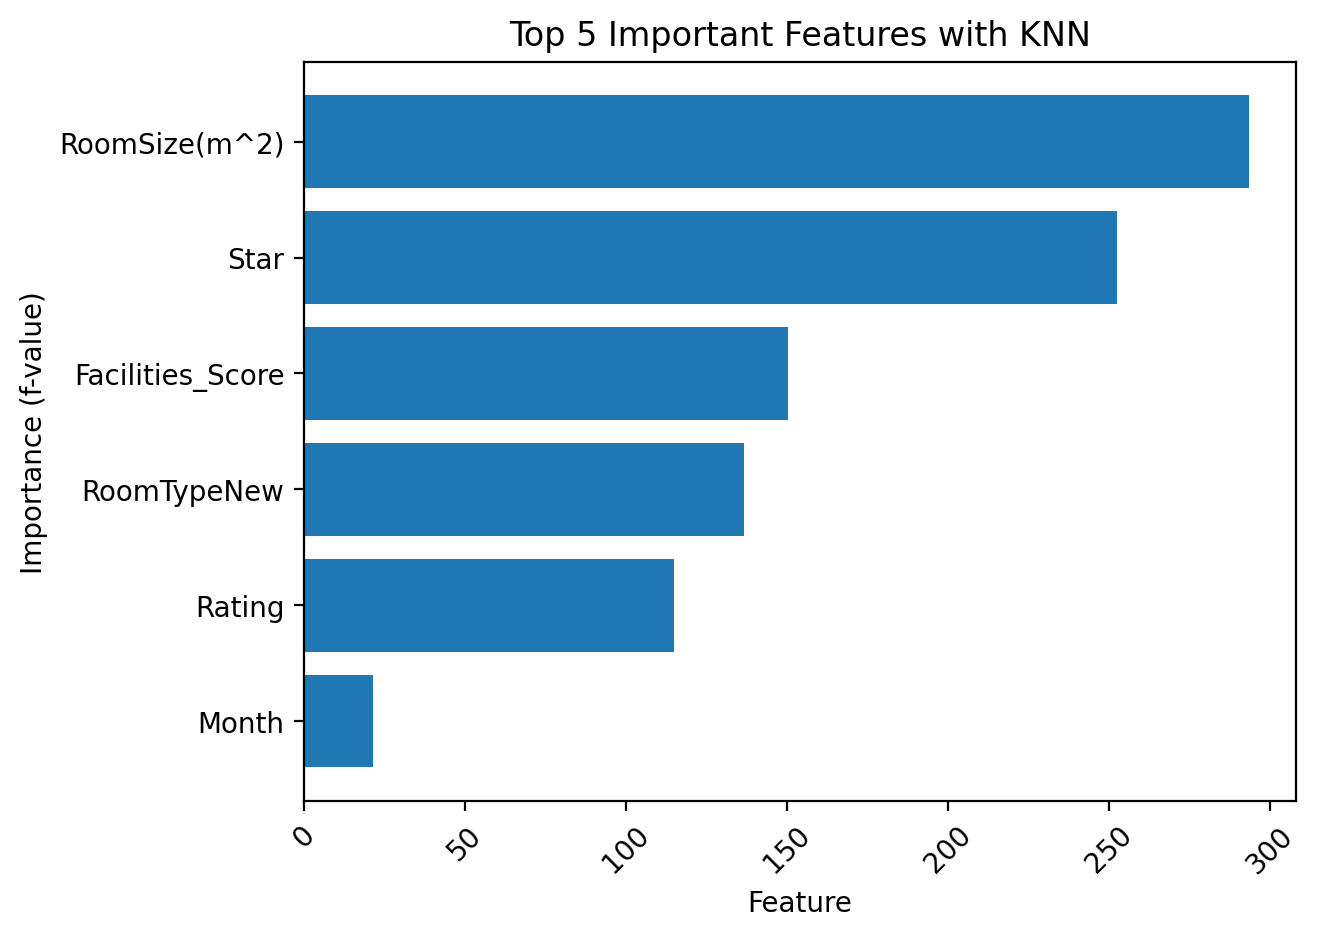

In [15]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_classif


X = df.drop(["Price(USD)"],axis=1)
y=df["Price(USD)"]

# Perform feature selection with KNN
k = 6


# SelectKBest with f_classif score function
skb = SelectKBest(score_func=f_classif, k=k)
selected_features = skb.fit_transform(X, y)
relevant_feature_indices = skb.get_support(indices=True)

# Get the names of the top 5 most important features in ascending order
top_features = X.columns[relevant_feature_indices]
importance_scores = skb.scores_
top_features_sorted = [x for _, x in sorted(zip(importance_scores, top_features))]
importance_scores_sorted = np.sort(importance_scores)[:k]

# Build the KNN model with the top 5 features
knn = KNeighborsRegressor()
knn.fit(selected_features, y)

# Visualize the feature importance in ascending order
plt.barh(top_features_sorted, importance_scores_sorted)
plt.xlabel('Feature')
plt.ylabel('Importance (f-value)')
plt.title('Top 5 Important Features with KNN')
plt.xticks(rotation=45)
plt.show()

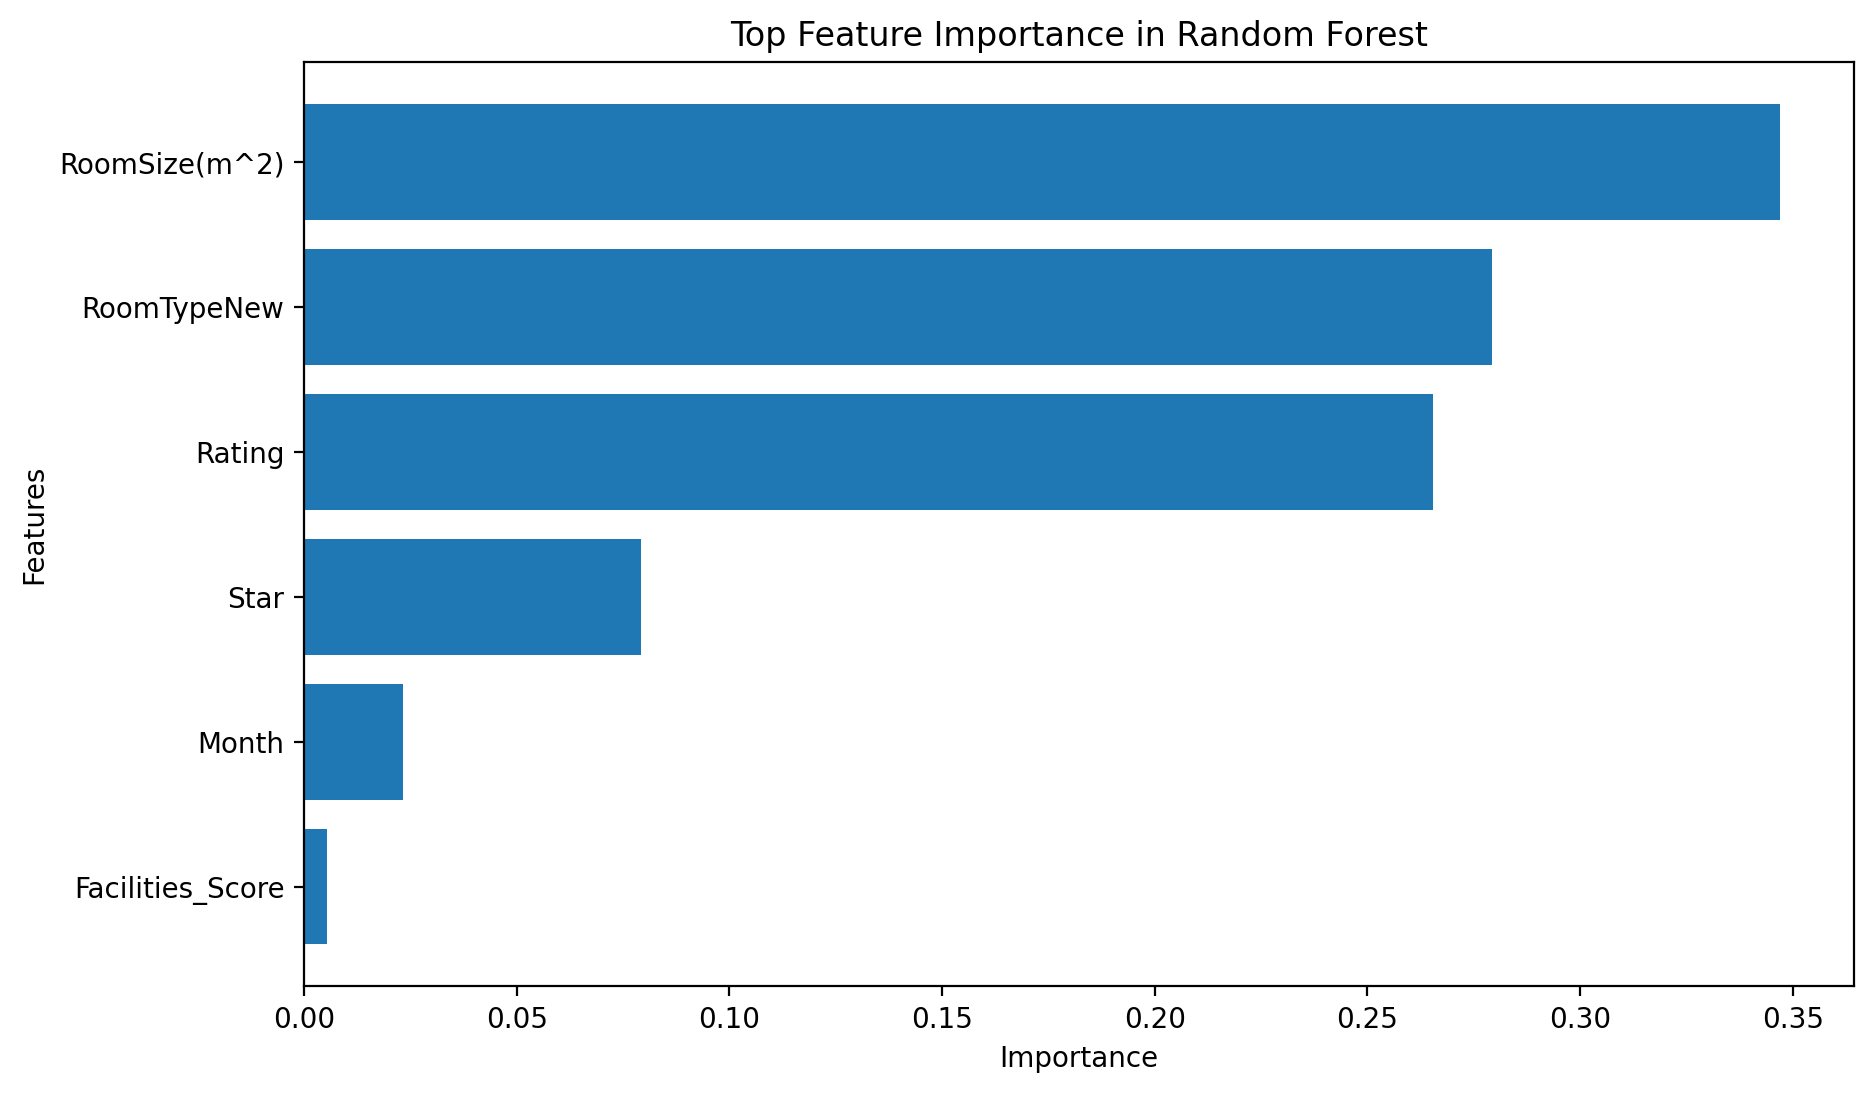

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df.drop(["Price(USD)"],axis=1)
y=df["Price(USD)"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Step 5: Obtain feature importances from the trained model
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=True).head(6)


# Step 6: Visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top Feature Importance in Random Forest')
plt.show()

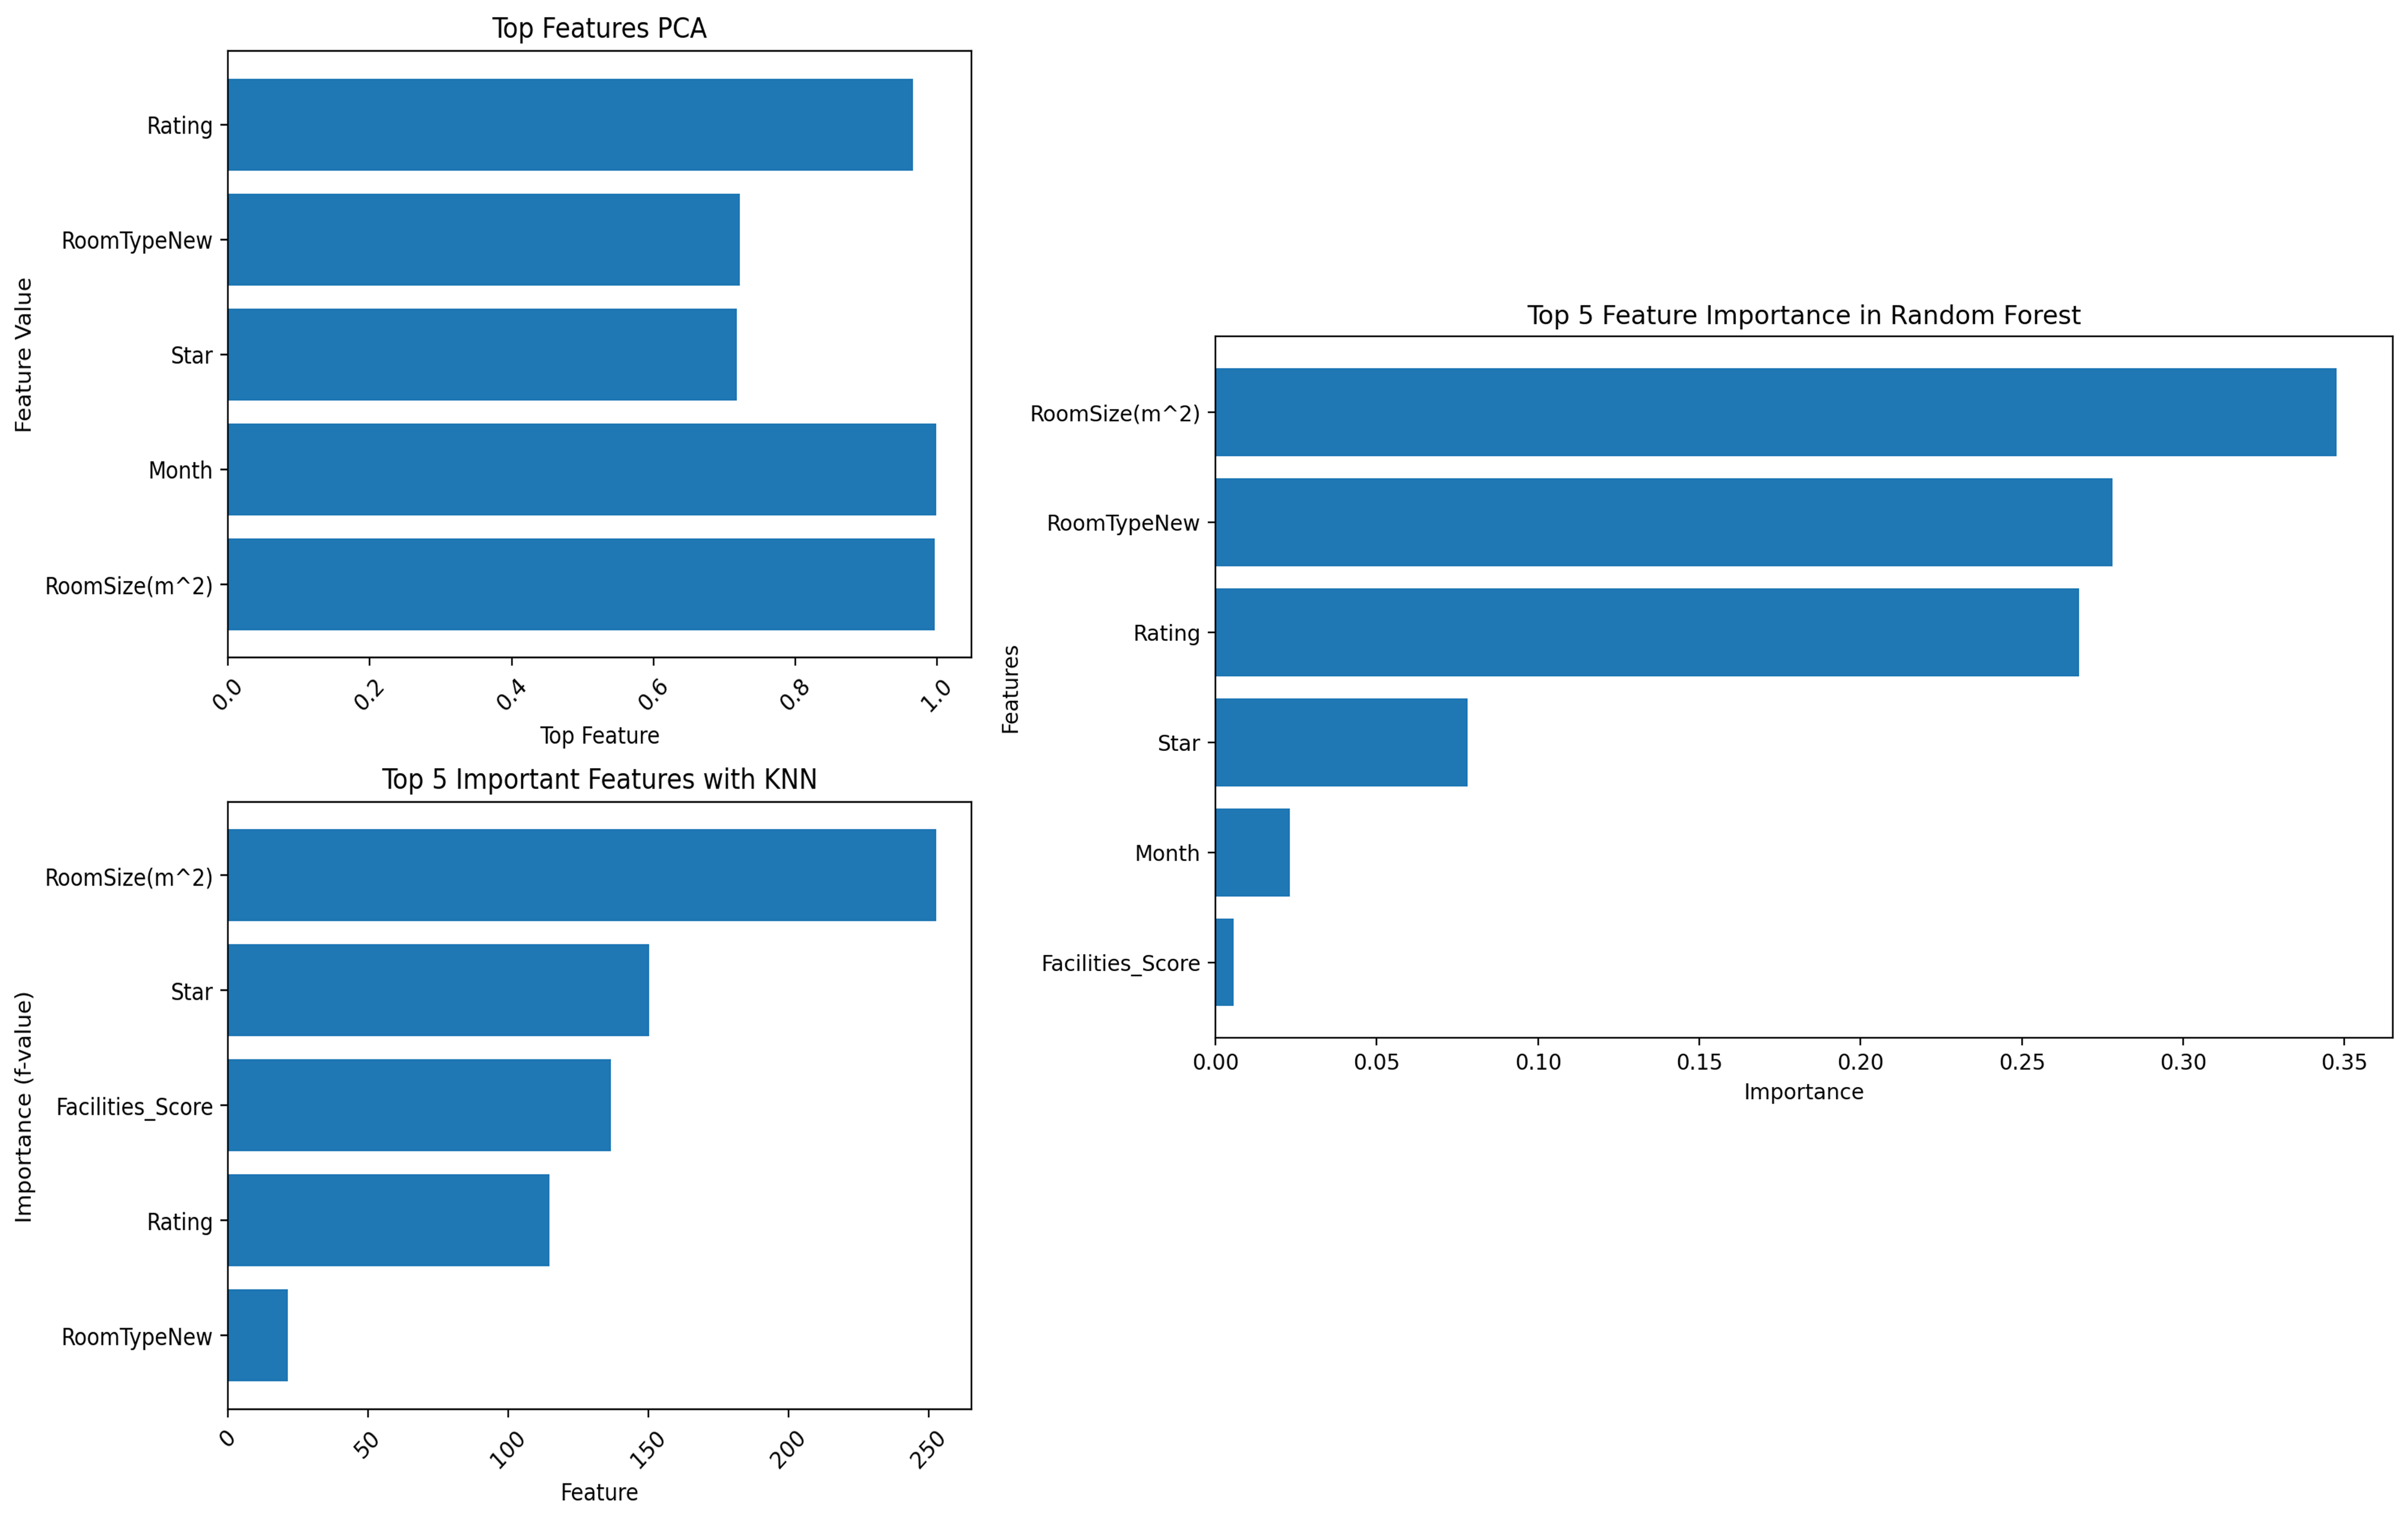

In [17]:
df.columns

Index(['Star', 'Rating', 'Price(USD)', 'RoomSize(m^2)', 'Month', 'RoomTypeNew',
       'Facilities_Score'],
      dtype='object')

### **Normaliza Data**

In [18]:
for col in df:
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[[col]])
df.head()

,Star,Rating,Price(USD),RoomSize(m^2),Month,RoomTypeNew,Facilities_Score
0,1.030278,1.168321,0.223307,-0.27843,-1.441635,-0.44192,0.334251
2,1.030278,1.168321,0.285943,-0.27843,-1.441635,-0.44192,0.334251
5,1.030278,1.168321,0.285943,-0.27843,-1.441635,-0.44192,0.334251
8,1.030278,1.168321,0.285943,-0.27843,-1.441635,-0.44192,0.334251
9,1.030278,1.168321,0.285943,-0.27843,-1.441635,-0.44192,0.334251


## **Model 1: Random Forest Regression**

In [32]:
X= df.drop('Price(USD)', axis = 1)
y= df[['Price(USD)']]
# Assuming you have your features and target variables in X and y, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regression model
model = RandomForestRegressor()
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2068\1751660270.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [33]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared: 0.9734226884058573
Mean Squared Error: 0.026580934987695242


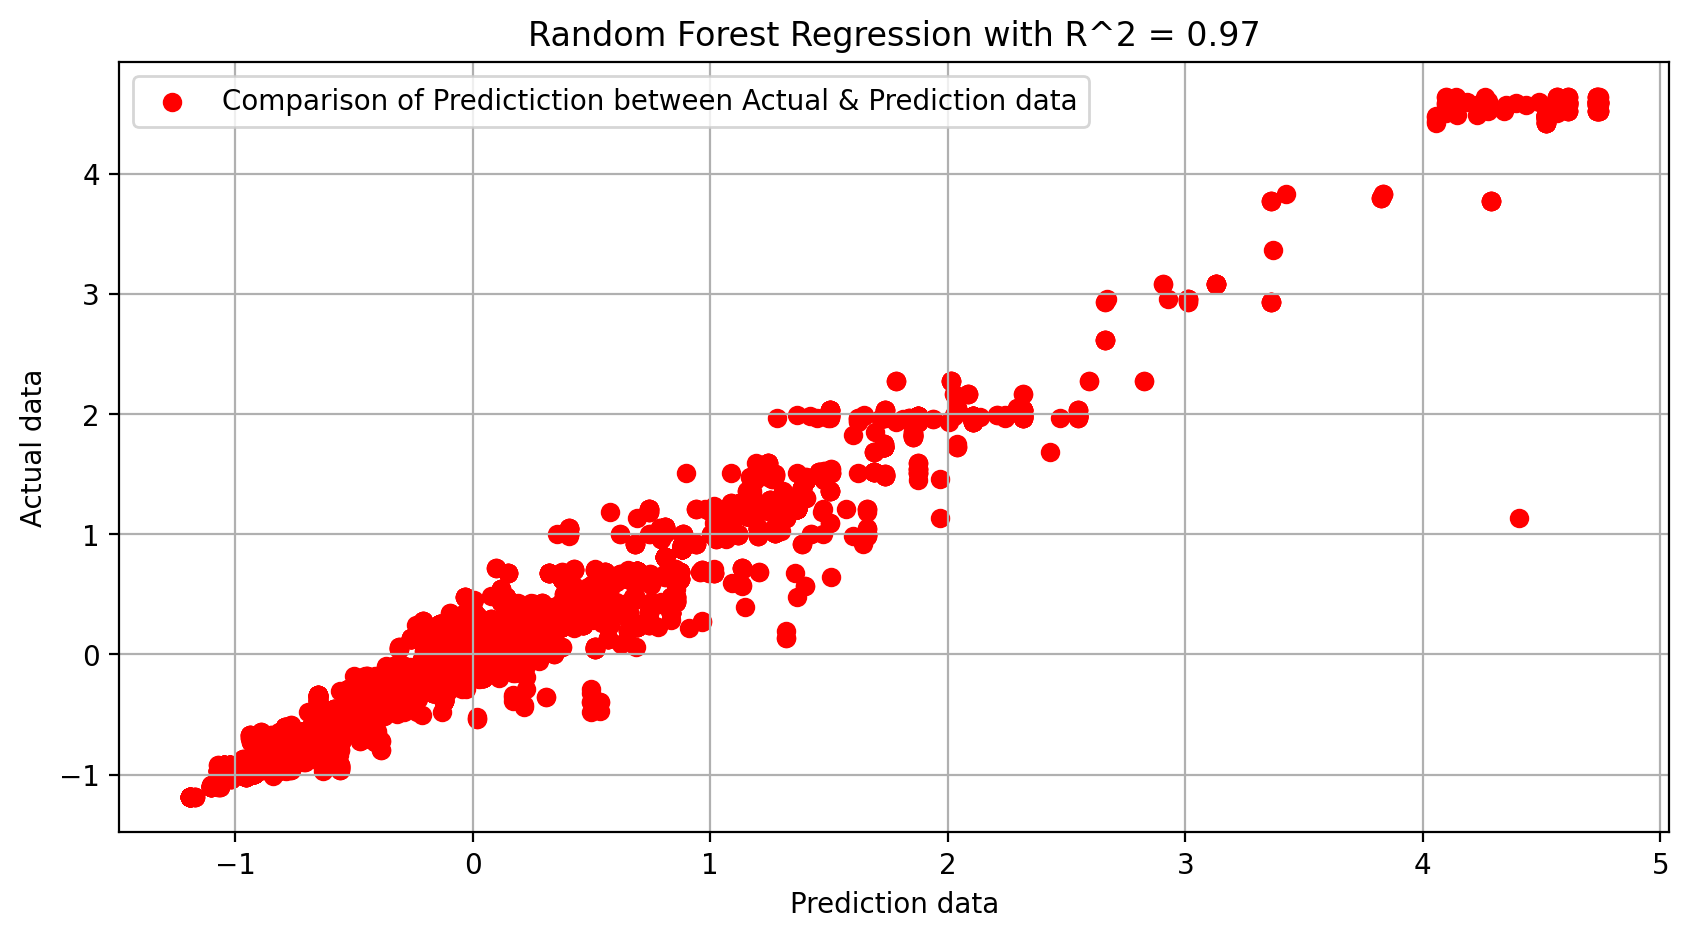

In [34]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred, color = 'red', label = 'Comparison of Predictiction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression with R^2 = 0.97')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

## **K-Fold Cross Validation On Random Forest**

In [35]:
from sklearn.model_selection import KFold, cross_val_score
# perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')


# calculate the average R-squared value across all folds
avg_r2 = np.mean(cv_scores)

# calculate the MSE, RMSE, and MAE
mse = -np.mean(cross_val_score(gbr, X3, y3, cv=kf, scoring='neg_mean_squared_error'))
rmse = np.sqrt(mse)
mae = -np.mean(cross_val_score(gbr, X3, y3, cv=kf, scoring='neg_mean_absolute_error'))

# print the results
print("Cross Validation on Random Forest ")
print('Cross-validated R-squared scores:', cv_scores)
print('Average R-squared score:', avg_r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Acer\AppData\Local\Programs\Python

Cross Validation on Random Forest 
Cross-validated R-squared scores: [0.97344814 0.97273151 0.97262897 0.96929812 0.97435187]
Average R-squared score: 0.972491721269213
MSE: 0.07007149307913751
RMSE: 0.26471020584619986
MAE: 0.19145504303283345


## **Model 2: Linear Regression**

In [23]:
X1 = df.drop('Price(USD)', axis=1)
y1 = df[['Price(USD)']]

# Split the data into training and testing sets:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X1_train, y1_train)

# Get the predicted values for the testing set
y1_pred = model.predict(X1_test)

# Calculate R-squared and mean squared error for the testing set
r2 = r2_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error: {:.2f}'.format(rmse))

R-squared: 0.3791242417269651
Mean Squared Error: 0.6209604048036473
Root Mean Squared Error: 0.79


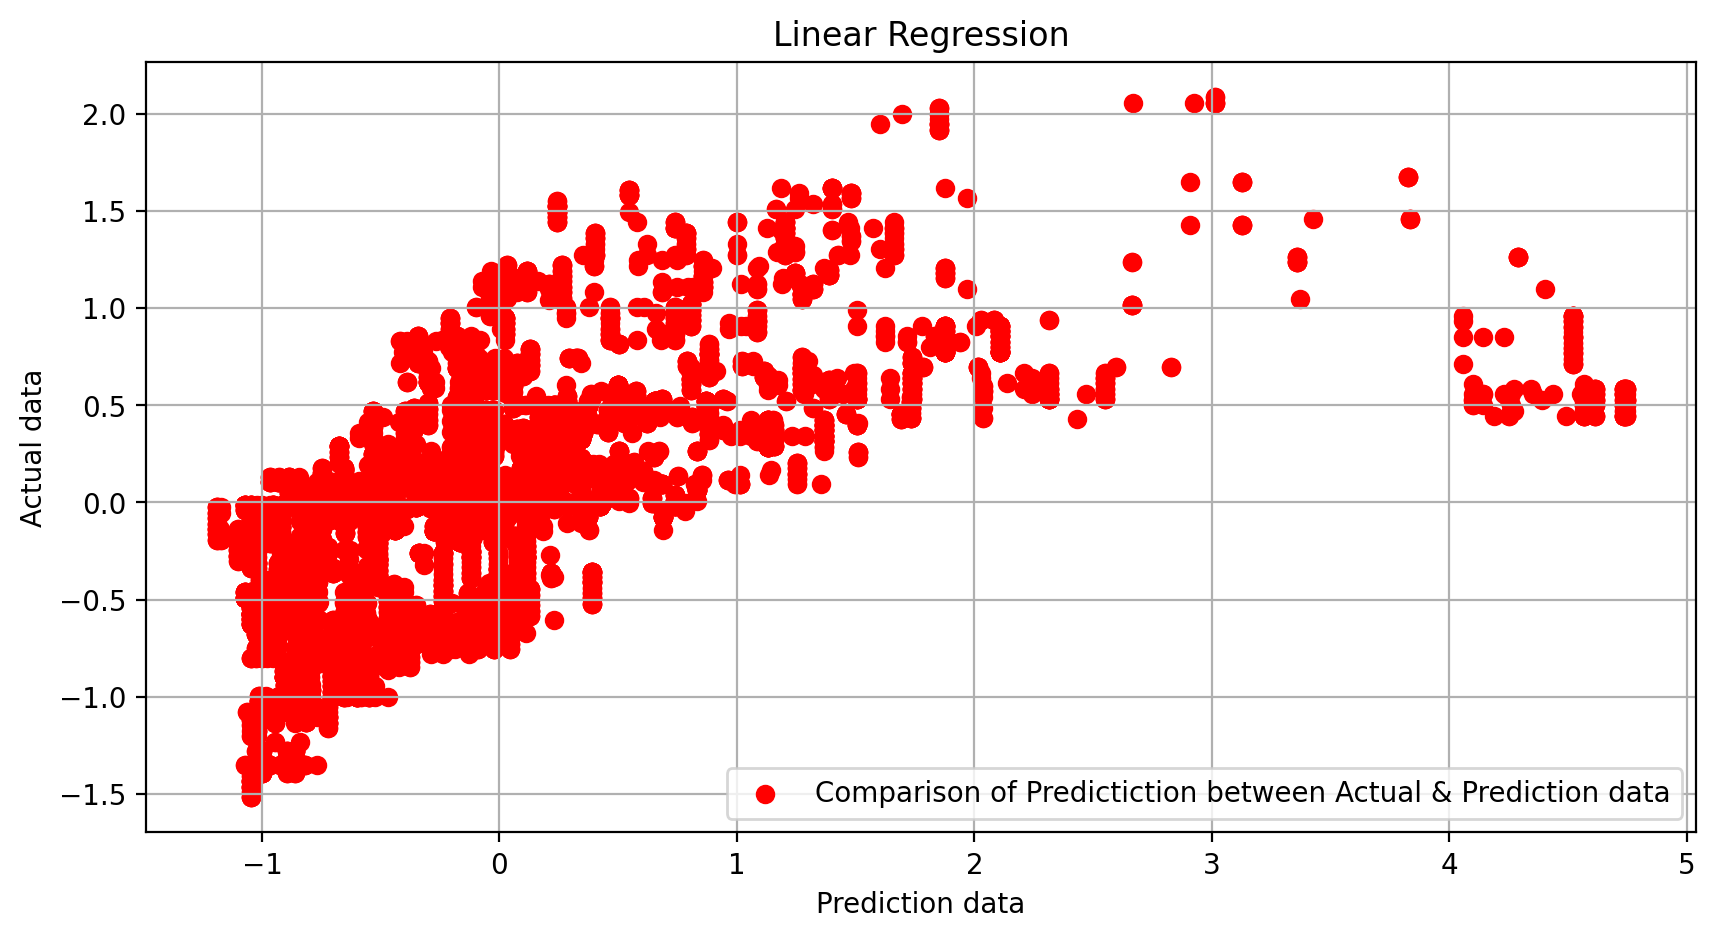

In [24]:
plt.figure(figsize = (10,5))
plt.scatter(y1_test, y1_pred, color = 'red', label = 'Comparison of Predictiction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Linear Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

## **Model 3: OLS Regression**

In [25]:
X2= df.drop('Price(USD)', axis = 1)
y2= df[['Price(USD)']]

#Split the data into training and testing sets:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model = sm.OLS(y2_train, X2_train).fit()

y2_pred = model.predict(X2_test)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Price(USD)   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              3417.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:17:00   Log-Likelihood:                         -39038.
No. Observations:               33137   AIC:                                  7.809e+04
Df Residuals:                   33131   BIC:                                  7.814e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

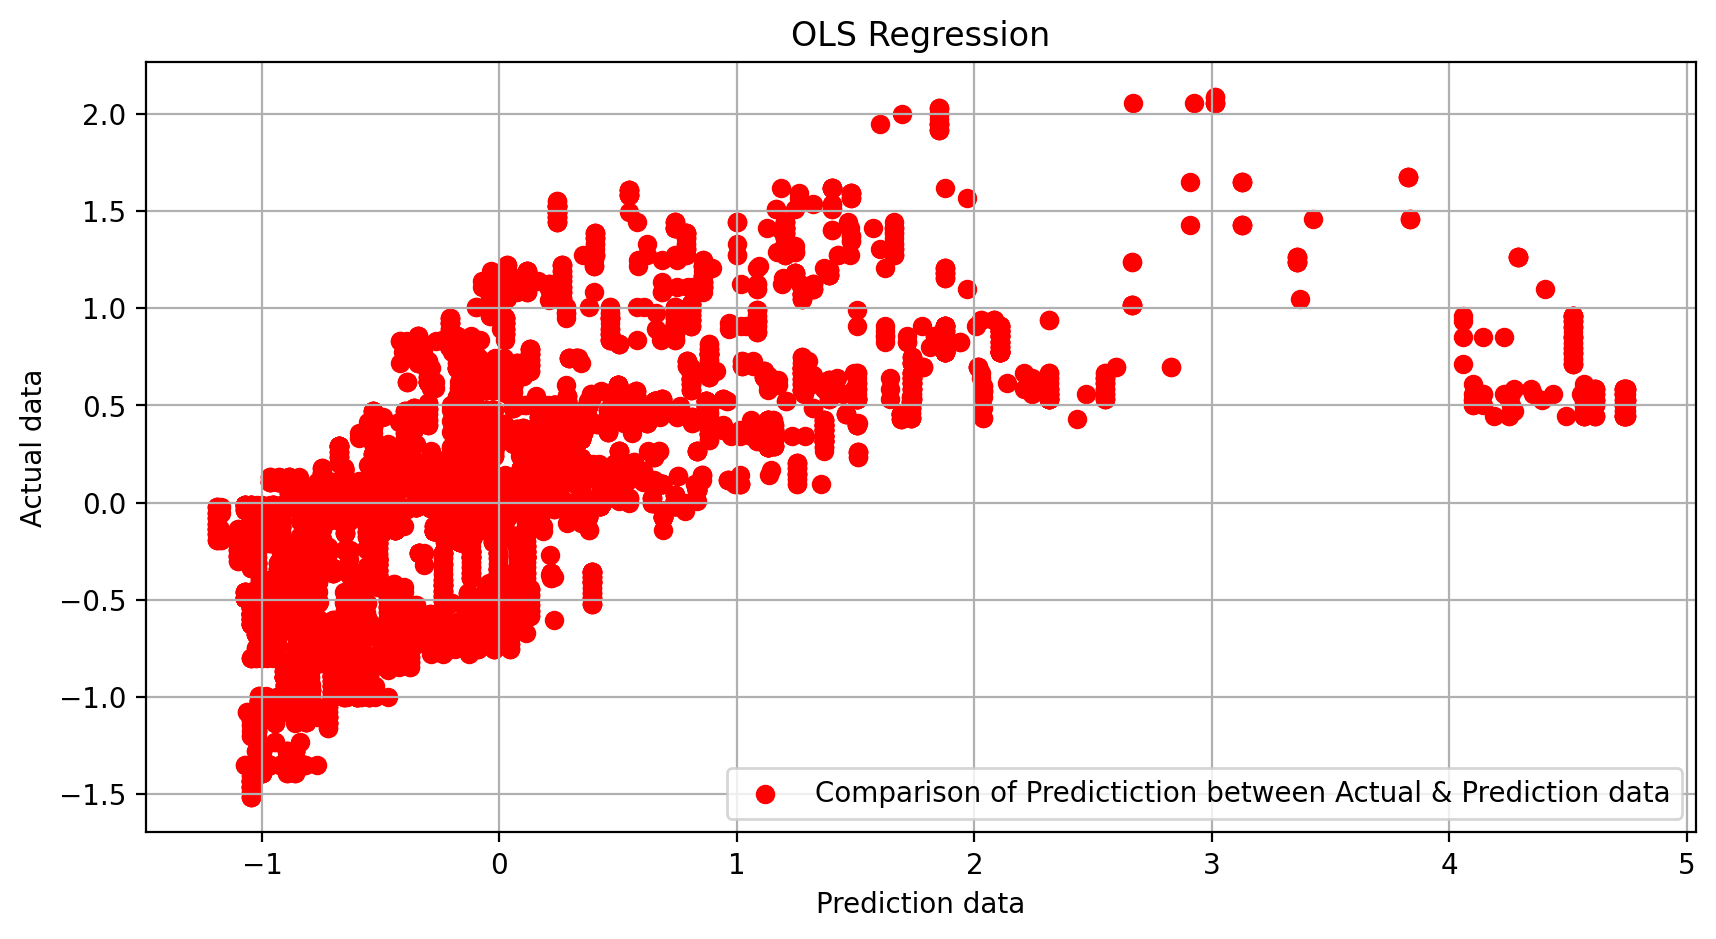

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(y2_test, y2_pred, color = 'red', label = 'Comparison of Predictiction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('OLS Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

## **Model 4: Grid Search and Gradient Boosting**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# separate the target variable from the features
X3 = df.drop('Price(USD)', axis=1)
y3 = df['Price(USD)']

# split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# create a gradient boosting regressor with 200 trees
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# fit the model to the training data
gbr.fit(X3_train, y3_train)

# perform grid search to find the best hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A colu

Best parameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.9721571767833076


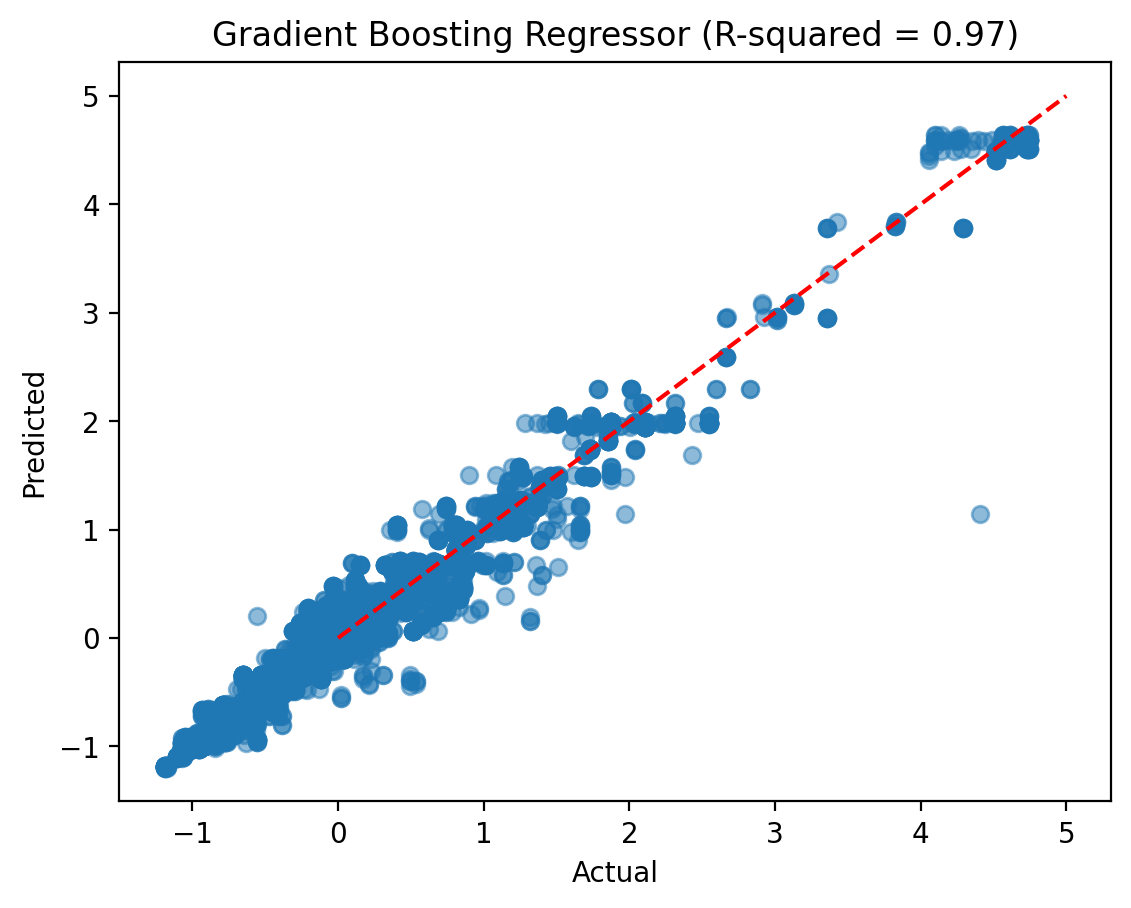

In [ ]:
# create a gradient boosting regressor with 200 trees
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.3, max_depth=5, random_state=42)

# fit the model to the training data
gbr.fit(X3_train, y3_train)

# predict the target variable on the testing data
y3_pred = gbr.predict(X3_test)

# calculate the R-squared value
r2 = r2_score(y3_test, y3_pred)

# plot the predicted vs actual values
plt.scatter(y3_test, y3_pred, alpha=0.5)
plt.plot(np.arange(0, y.max()), np.arange(0, y.max()), color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor (R-squared = %0.2f)' % r2)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gbr, X3, y3, cv=kf, scoring='r2')

# calculate the average R-squared value across all folds
avg_r2 = np.mean(cv_scores)

# calculate the MSE, RMSE, and MAE
mse = -np.mean(cross_val_score(gbr, X3, y3, cv=kf, scoring='neg_mean_squared_error'))
rmse = np.sqrt(mse)
mae = -np.mean(cross_val_score(gbr, X3, y3, cv=kf, scoring='neg_mean_absolute_error'))

# print the results
print("Cross Validation on Gradient Boosting ")
print('Cross-validated R-squared scores:', cv_scores)
print('Average R-squared score:', avg_r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

Cross Validation on Gradient Boosting 
Cross-validated R-squared scores: [0.92709319 0.92981323 0.9324857  0.92114834 0.93818413]
Average R-squared score: 0.9297449186029816
MSE: 0.07007149307913751
RMSE: 0.26471020584619986
MAE: 0.19145504303283345
